# Image Classification with CNN Model

## Imports

In [1]:
from numpy.random import seed
seed(888)
from random import randint
from tensorflow import random
random.set_seed( 404 )

In [2]:
import os
import numpy as np
import itertools

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import TensorBoard
# from keras.models import model_from_json
from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [3]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird' , 'Cat', 'Deer', 'Dog', 'Frog', 'Horse','Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH*IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS*COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000


## Getting Data

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [5]:
type(x_train_all)

numpy.ndarray

## Exploring Data

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Text(0.5, 0, 'Horse')

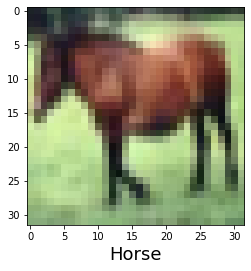

In [8]:
plt.imshow(x_train_all[7])
plt.xlabel(LABEL_NAMES[y_train_all[7][0]],fontsize=18)

#### Displaying first 10 images from dataset

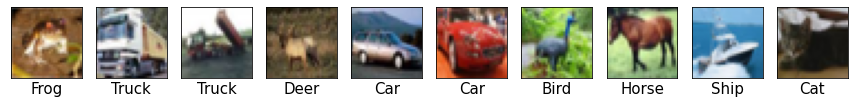

In [9]:
plt.figure(figsize=( 15,5))

for i in range( 10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)
    plt.imshow(x_train_all[i])


In [10]:
x_train_all[0].shape

(32, 32, 3)

In [11]:
nr_images, x, y, c = x_train_all.shape
print(f"images = {nr_images} \t| width= {x} \t| height= {y} \t| channels= {c}")

images = 50000 	| width= 32 	| height= 32 	| channels= 3


In [12]:
x_test.shape

(10000, 32, 32, 3)

## Preprocessing Data

In [13]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [14]:
# Normalization
x_train_all, x_test =  x_train_all/255.0, x_test/255.0

In [15]:
type(x_train_all[0][0][0][0])

numpy.float64

In [16]:
x_train_all[0][0][0][0]

0.23137254901960785

In [17]:
x_train_all.shape

(50000, 32, 32, 3)

#### Create Validation Dataset

In [18]:
x_val = x_train_all[ :VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

#### Creating Training Dataset with 40000 instances

In [19]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 32, 32, 3)

Create a small dataset of 1000 instances (for illustration)

In [20]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]
x_train_xs.shape

(1000, 32, 32, 3)

## Define the Neural Network using Keras

### Model-1

In [72]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation ='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name ='m1_hidden2'),
    Dense(16, activation ='relu', name ='m1_hidden3'),
    Dense(10, activation ='softmax' , name ='ml_output')
])

model_1.compile(optimizer='adam' ,
loss='sparse_categorical_crossentropy', metrics=[ 'accuracy'])

In [73]:
type(model_1)

keras.engine.sequential.Sequential

In [74]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 ml_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


### Model-2

In [22]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_2.add(Dense(128, activation ='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m2_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


### Model-4

In [22]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), activation ='relu', padding ='same', input_shape=(32,32,3)))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(64, ( 3, 3), activation ='relu', padding ='same'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, (3, 3), activation ='relu', padding ='same'))
model_4.add(MaxPooling2D((2, 2)))
model_4.add(Dropout(0.3))

model_4.add(Flatten())
model_4.add(Dense(128, activation ='relu', name ='m3_hidden1'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10, activation='softmax', name ='m3_output'))
model_4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)         

#### Tensorboard (Visualising Training)

In [24]:
def	get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%d %H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print( "Successfully created directory")

    return TensorBoard(log_dir =dir_paths)

## Fit the Model

In [25]:
samples_per_batch = 1000

In [26]:
# %%time
# nr_epochs = 156
# model_l.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr
#	callbacks=[get_tensorboard('modeL_l')J, verbose=6,
#	validation_data=(x_val, y_vaL))

In [27]:
# %% time
# nr_epochs = 100
# model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, callbacks =[get_tensorboard( 'Model 1 XL')], verbose=0,
# validation_data =(x_val , y_val))

In [75]:
# Fitting the model on small dataset

# %%time
# nr_epochs = 156
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr
#	caLLbacks=[get_tensorboard('ModeL 2')], verbose=6,
#	validation_data=(x_val, y_val))

Datasets for training Model-2

In [29]:
(x_train_all_2, y_train_all_2), (x_test2, y_test2) = cifar10.load_data()

# Normalization
x_train_all_2, x_test2 =  x_train_all_2/255.0, x_test2/255.0

x_train_all_2 = x_train_all_2.reshape(x_train_all_2.shape[0], TOTAL_INPUTS)
x_test2 = x_test2.reshape(x_test2.shape[0], TOTAL_INPUTS)
x_val2 = x_train_all_2[ :VALIDATION_SIZE]
y_val2 = y_train_all_2[:VALIDATION_SIZE]
x_val2.shape

(10000, 3072)

In [30]:
x_train2 = x_train_all_2[VALIDATION_SIZE:]
y_train2 = y_train_all_2[VALIDATION_SIZE:]
x_train2.shape

(40000, 3072)

In [31]:
%%time
nr_epochs = 100
model_2.fit(x_train2, y_train2, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('Model 2 XL')], verbose=1, validation_data=(x_val2, y_val2))

Successfully created directory
Epoch 1/100
40/40 [==============================] - 4s 77ms/step - loss: 2.2669 - accuracy: 0.1570 - val_loss: 2.2017 - val_accuracy: 0.1956
Epoch 2/100
40/40 [==============================] - 2s 62ms/step - loss: 2.1743 - accuracy: 0.2049 - val_loss: 2.1178 - val_accuracy: 0.2328
Epoch 3/100
40/40 [==============================] - 2s 54ms/step - loss: 2.0608 - accuracy: 0.2523 - val_loss: 1.9805 - val_accuracy: 0.2889
Epoch 4/100
40/40 [==============================] - 2s 53ms/step - loss: 1.9538 - accuracy: 0.2941 - val_loss: 1.9397 - val_accuracy: 0.2822
Epoch 5/100
40/40 [==============================] - 2s 51ms/step - loss: 1.8943 - accuracy: 0.3161 - val_loss: 1.8508 - val_accuracy: 0.3337
Epoch 6/100
40/40 [==============================] - 2s 51ms/step - loss: 1.8531 - accuracy: 0.3358 - val_loss: 1.8004 - val_accuracy: 0.3569
Epoch 7/100
40/40 [==============================] - 2s 50ms/step - loss: 1.8032 - accuracy: 0.3577 - val_loss: 1.764

In [28]:
%%time
# Fitting Model-4 (with Conv layer) on large dataset
nr_epochs = 100
model_4.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, callbacks=[get_tensorboard('Model 4 Conv XL')], verbose=1, validation_data=(x_val, y_val))

Successfully created directory
Epoch 1/100
40/40 [==============================] - 48s 1s/step - loss: 2.1220 - accuracy: 0.2043 - val_loss: 1.9097 - val_accuracy: 0.3241
Epoch 2/100
40/40 [==============================] - 46s 1s/step - loss: 1.7770 - accuracy: 0.3522 - val_loss: 1.6501 - val_accuracy: 0.4096
Epoch 3/100
40/40 [==============================] - 46s 1s/step - loss: 1.6355 - accuracy: 0.4009 - val_loss: 1.5170 - val_accuracy: 0.4494
Epoch 4/100
40/40 [==============================] - 49s 1s/step - loss: 1.5266 - accuracy: 0.4444 - val_loss: 1.4112 - val_accuracy: 0.4947
Epoch 5/100
40/40 [==============================] - 46s 1s/step - loss: 1.4601 - accuracy: 0.4691 - val_loss: 1.3716 - val_accuracy: 0.5000
Epoch 6/100
40/40 [==============================] - 46s 1s/step - loss: 1.4010 - accuracy: 0.4946 - val_loss: 1.2784 - val_accuracy: 0.5435
Epoch 7/100
40/40 [==============================] - 47s 1s/step - loss: 1.3373 - accuracy: 0.5193 - val_loss: 1.2093 - val

## Prediction

In [61]:
x_val2[0].shape

(3072,)

In [62]:
test = np.expand_dims(x_val2[0], axis=0)
test.shape

(1, 3072)

In [63]:
np.set_printoptions(precision=3)

In [64]:
model_2.predict(test)

array([[1.154e-02, 5.877e-04, 9.033e-02, 1.181e-01, 7.338e-02, 1.395e-01,
        5.158e-01, 5.064e-02, 7.002e-05, 7.524e-05]], dtype=float32)

In [65]:
np.argmax(model_2.predict(test), axis=1)

array([6], dtype=int64)

##### Predicting Values using Model-2

In [67]:
print("Model-2 Predictions on validation set:\n")
for number in range(10):
    test_img = np.expand_dims(x_val2[number], axis =0)
    predicted_arr = model_2.predict(test_img)
    predicted_val = np.argmax(predicted_arr, axis=1)[0]
    print(f'Actual value: {y_val2[number][ 0]} vs Predicted: {predicted_val}')

Model-2 Predictions on validation set:

Actual value: 6 vs Predicted: 6
Actual value: 9 vs Predicted: 1
Actual value: 9 vs Predicted: 9
Actual value: 4 vs Predicted: 6
Actual value: 1 vs Predicted: 8
Actual value: 1 vs Predicted: 9
Actual value: 2 vs Predicted: 2
Actual value: 7 vs Predicted: 7
Actual value: 8 vs Predicted: 8
Actual value: 3 vs Predicted: 9


In [68]:
# Predicting Values using test dataset
print("Model-2 Predictions on test dataset:\n")
for number in range(10):
    test_image = np. expand_dims(x_test2[number], axis=0)
    prediction_arr = model_2.predict(test_image)
    prediction_val = np.argmax( prediction_arr , axis=1)[0]
    print(f'Actual value: {y_test[number][ 0]} vs Predicted: {prediction_val}')

Model-2 Predictions on test dataset:

Actual value: 3 vs Predicted: 3
Actual value: 8 vs Predicted: 8
Actual value: 8 vs Predicted: 8
Actual value: 0 vs Predicted: 8
Actual value: 6 vs Predicted: 4
Actual value: 6 vs Predicted: 6
Actual value: 1 vs Predicted: 3
Actual value: 6 vs Predicted: 6
Actual value: 3 vs Predicted: 4
Actual value: 1 vs Predicted: 1


##### Predicting Values using Model-4

In [29]:
# Predicting Values using test dataset
for number in range(5):
    test_image = np. expand_dims(x_test[number], axis=0)
    prediction_arr = model_4.predict(test_image)
    prediction_val = np.argmax( prediction_arr , axis=1)[0]
    print(f'Actual value: {y_test[number][ 0]} vs Predicted: {prediction_val}')

Actual value: 3 vs Predicted: 3
Actual value: 8 vs Predicted: 8
Actual value: 8 vs Predicted: 8
Actual value: 0 vs Predicted: 0
Actual value: 6 vs Predicted: 6


In [30]:
for _ in range( 15):
    number = randint( 0, 9999)
    test_img = np.expand_dims(x_test[number], axis=0)
    predicted_arr = model_4.predict(test_img)
    predicted_val = np.argmax( predicted_arr, axis=1)[0]
    print(f'Actual label: {LABEL_NAMES[y_test[number][0]]} vs Predicted Label: {LABEL_NAMES[predicted_val]}')


Actual label: Frog vs Predicted Label: Frog
Actual label: Truck vs Predicted Label: Truck
Actual label: Horse vs Predicted Label: Cat
Actual label: Cat vs Predicted Label: Horse
Actual label: Plane vs Predicted Label: Ship
Actual label: Ship vs Predicted Label: Ship
Actual label: Car vs Predicted Label: Car
Actual label: Ship vs Predicted Label: Ship
Actual label: Cat vs Predicted Label: Cat
Actual label: Car vs Predicted Label: Car
Actual label: Ship vs Predicted Label: Ship
Actual label: Bird vs Predicted Label: Bird
Actual label: Frog vs Predicted Label: Frog
Actual label: Ship vs Predicted Label: Ship
Actual label: Car vs Predicted Label: Car


## Model-2 Evaluation

In [31]:
model_2.metrics_names

NameError: name 'model_2' is not defined

In [32]:
test_loss, test_accuracy = model_2.evaluate(x_test2, y_test2)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1}')

NameError: name 'model_2' is not defined

### Confusion Matrix

In [35]:
predictions = model_2.predict(x_test2)
predictions_val = np.argmax( predictions, axis=-1)
conf_matrix = confusion_matrix(y_test2, predictions_val)

In [36]:
conf_matrix.shape

(10, 10)

In [37]:
nr_rows = conf_matrix[0]
nr_cols = conf_matrix[1]

In [38]:
conf_matrix.max()

645

In [39]:
conf_matrix.min()

3

In [40]:
conf_matrix[0]

array([617,   8,  81,  19,  39,  17,  22,  32, 134,  31], dtype=int64)

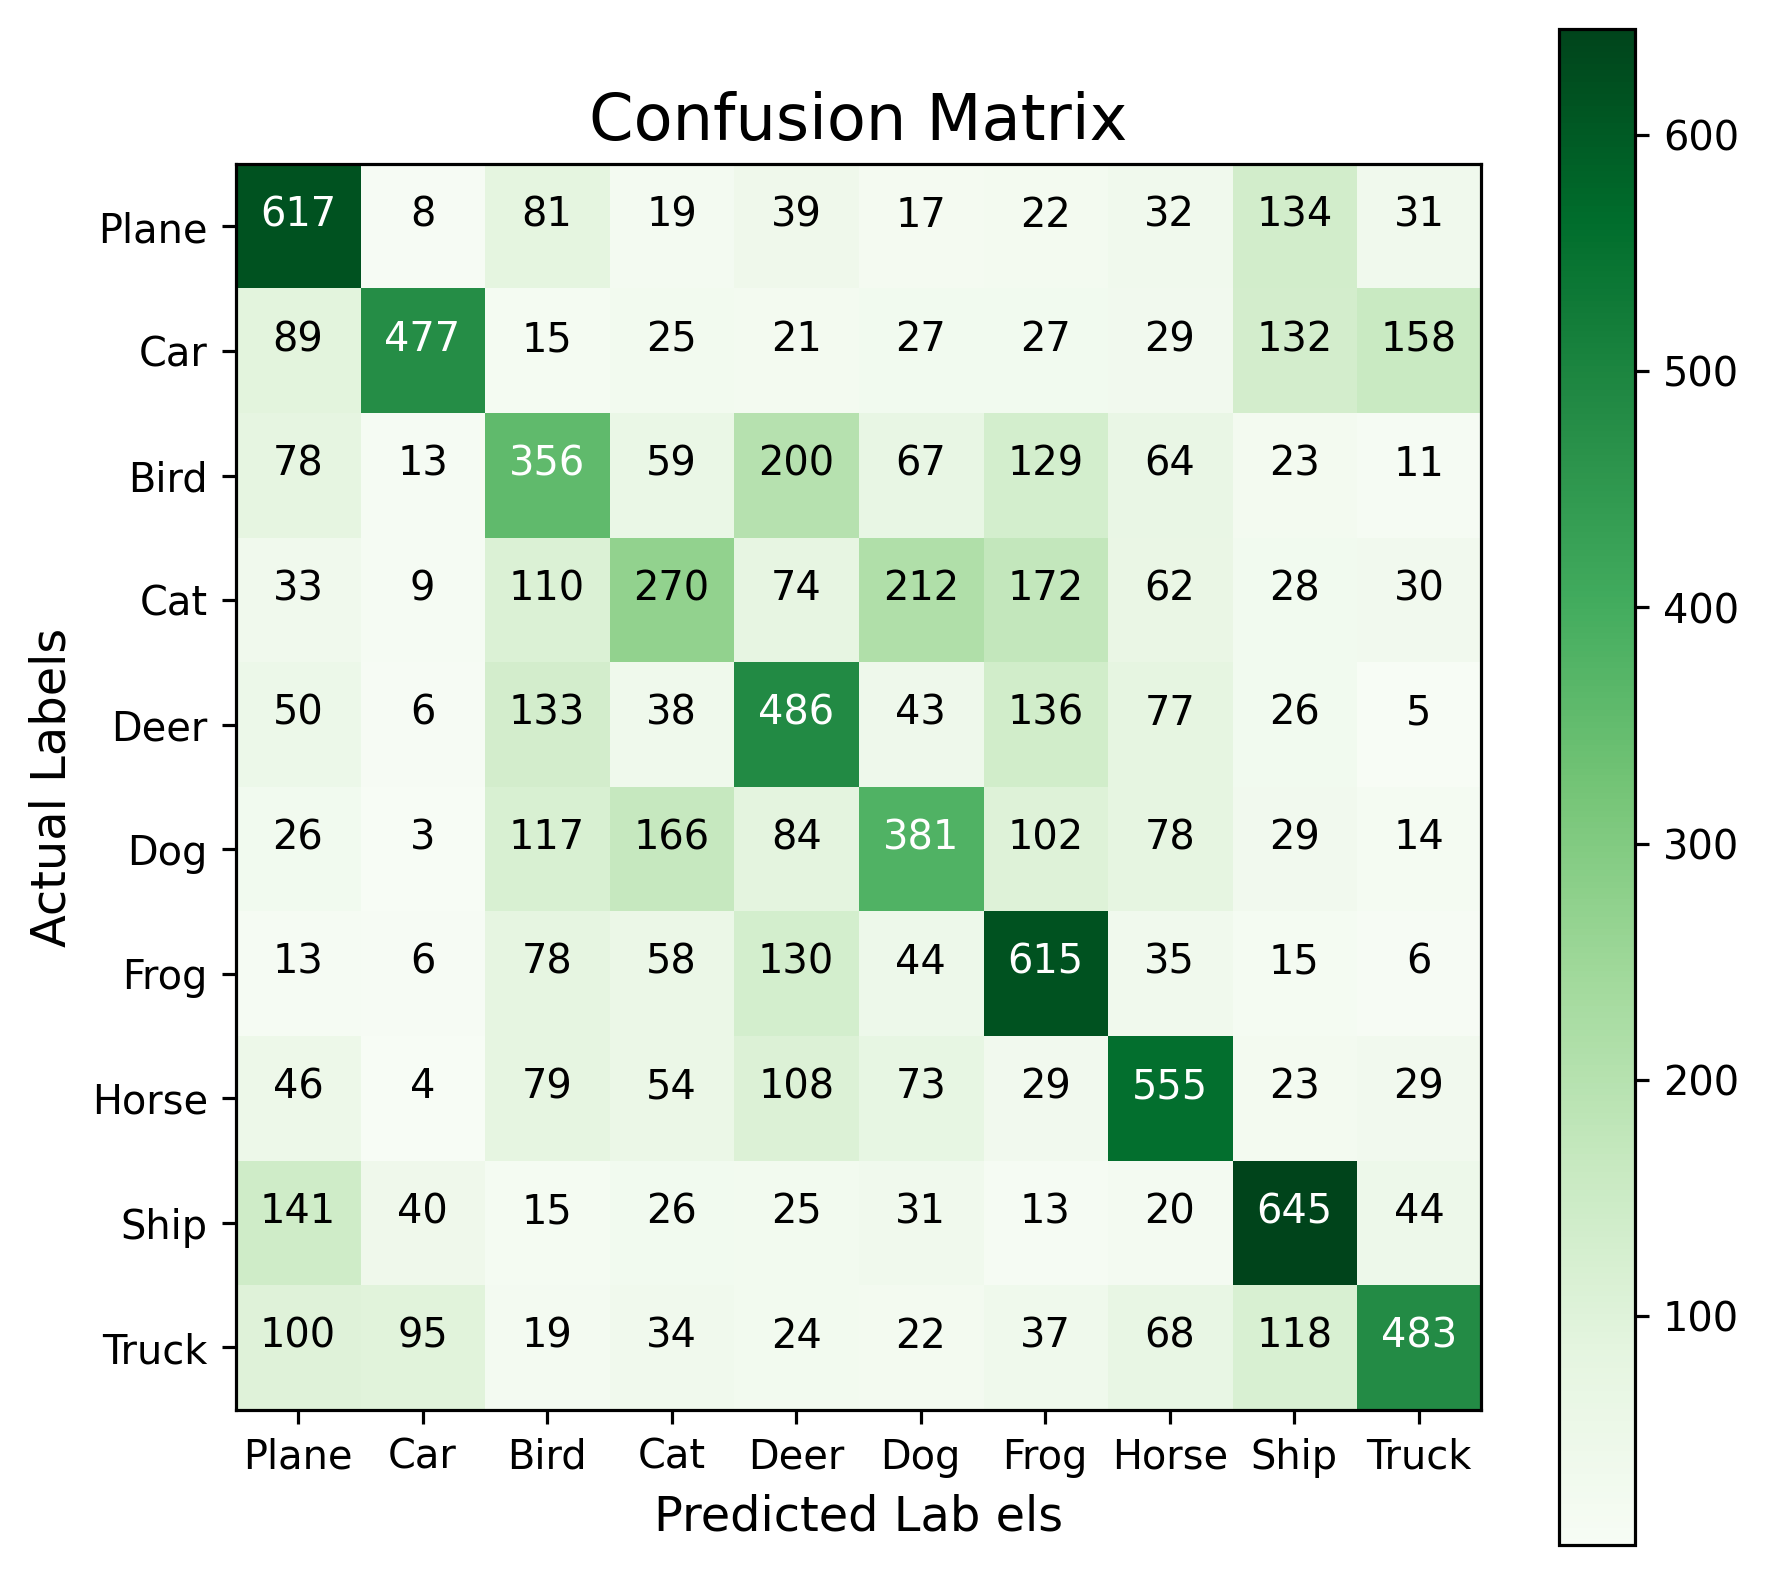

In [41]:
plt.figure(figsize=( 7,7), dpi =287)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix' , fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Lab els', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product( range(10), range( 10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment ='center', color ='white' if conf_matrix[i ,j]>conf_matrix.max()/2 else 'black')

plt.show()

In [42]:
# True Positives
np.diag(conf_matrix)

array([617, 477, 356, 270, 486, 381, 615, 555, 645, 483], dtype=int64)

In [43]:
# Recall Score
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.617, 0.477, 0.356, 0.27 , 0.486, 0.381, 0.615, 0.555, 0.645,
       0.483])

In [58]:
avg_recall = np.mean(recall)
print(f'Model-2 recall score is {avg_recall: .2%}')

Model-2 recall score is  48.85%


In [45]:
# Precision Score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis =0)
precision

array([0.51718357, 0.72163389, 0.35493519, 0.36048064, 0.40806045,
       0.41548528, 0.47971919, 0.54411765, 0.54987212, 0.59556104])

In [59]:
avg_precision = np.mean( precision)
print(f'Model-2 precision score is {avg_precision:.2%}')

Model-2 precision score is 49.47%


In [54]:
# F1 Score
f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model-2 f1 score is {f1_score :.2%}')

Model-2 f1 score is 49.16%


## Model-4 Evaluation

Metrics Names: ['loss', 'accuracy'] 
313/313 [==============================] - 4s 13ms/step - loss: 0.6165 - accuracy: 0.7908
Test loss is 0.616 and test accuracy is 0.8
Confusion Matrix Shape: (10, 10)


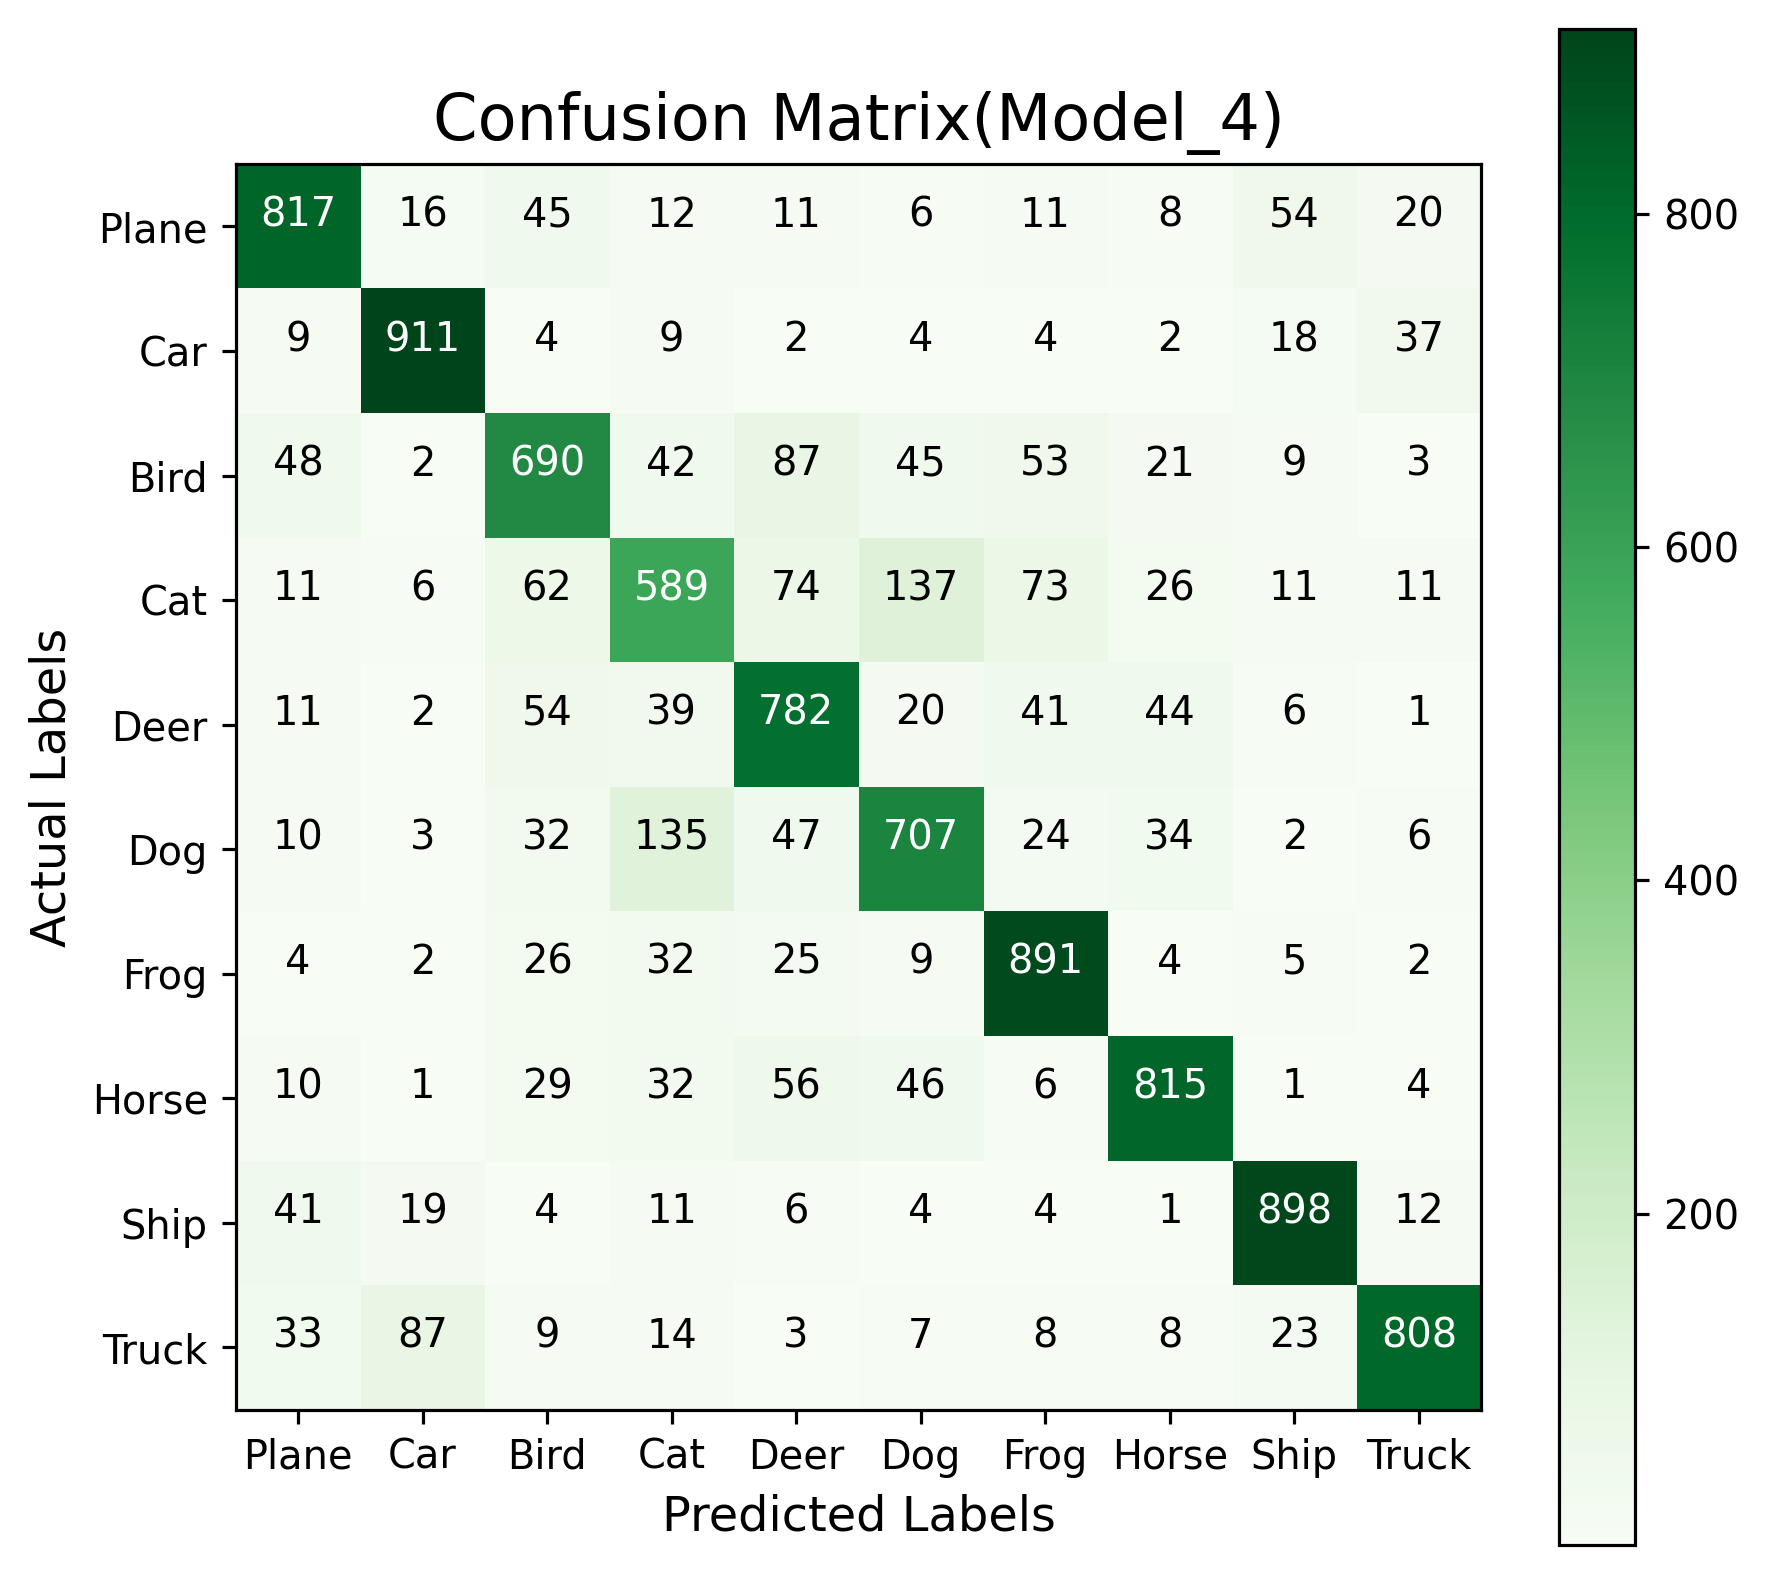

True positives(diagonal elements of confusion matrix) are:
	[817 911 690 589 782 707 891 815 898 808]
Model-4 precision score is 79.03%
Model-4 recall score is  79.08%
Model-4 f1 score is 79.06%


In [33]:
print(f"Metrics Names: {model_4.metrics_names} ")

test_loss, test_accuracy = model_4.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1}')

predictions = model_4 .predict(x_test)
predictions_val = np.argmax( predictions, axis=-1)
conf_matrix = confusion_matrix(y_test, predictions_val)

print(f"Confusion Matrix Shape: { conf_matrix.shape}")
nr_rows = conf_matrix[0]
nr_cols = conf_matrix[1]

plt.figure(figsize=( 7,7), dpi =287)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix(Model_4)' , fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product( range( 10), range( 10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center', color ='white' if conf_matrix[i,j]>conf_matrix.max() /2 else 'black')


plt.show()
# True Positives
print(f"True positives(diagonal elements of confusion matrix) are:\n\t{np.diag(conf_matrix)}")
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis =0)

# Precision Score
avg_precision = np.mean( precision)
print(f'Model-4 precision score is {avg_precision:.2%}')

# Recall Score
avg_recall = np.mean(recall)
print(f'Model-4 recall score is {avg_recall: .2%}')

# F1 Score
fl_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model-4 f1 score is {fl_score :.2%}')